In [1]:
# keras imported (just for import dataset) 
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

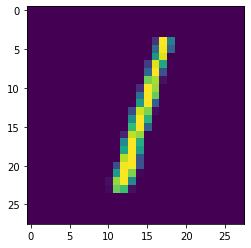

In [2]:
(x_train,y_train) , (x_test, y_test) = keras.datasets.mnist.load_data() 
x_train = x_train[:10000] / 255
y_train = y_train[:10000]
x_test = x_test[:1000] / 255
y_test = y_test[:1000]

plt.imshow(x_test[2])

In [3]:
def centroid(grid):
    if np.all((grid == 0)):
        return (3.5,3.5)
    return ndimage.measurements.center_of_mass(grid)

def crop_feature(test_image, blocks):
    rows , cols = int(test_image.shape[0] / blocks), int(test_image.shape[1] / blocks)
    vector = list()
    k,f = cols,0
    for i in range(blocks):
        c,z = rows,0
        for r in range(blocks):
                window = test_image[f:k,z:c]
                c += rows
                z += rows
                x,y = centroid(window)
                vector.extend([x,y])
        k += cols
        f += cols
    return np.array(vector)

In [4]:
x_train1 = list() 
x_test1  = list() 

for i in x_train:
    x_train1.append(crop_feature(i,4))

for i in x_test:
    x_test1.append(crop_feature(i,4))

    
# normalize input values from 0 -> 1 

x_train1 = np.array(x_train1)
x_test1 = np.array(x_test1)
x_train1 = x_train1.transpose() / 7
x_test1  = x_test1.transpose() / 7

In [5]:
# oneHot encoding for y train values

y_train = np.array(pd.get_dummies(y_train)).transpose()

In [6]:
class ANN():
    
    def __init__(self):   
        pass
    
    def argmax(self, data):
        l = list(data)
        maxl = max(l)
        best = l.index(maxl)
        return best
        
        
    def sigmoid(self, x):
        return (1 / (1 + np.exp(-x)))  

    
    def initialize_parameters(self, n_x, n_h, n_y):
        """
        Argument:
        n_x -- size of the input layer
        n_h -- size of the hidden layer
        n_y -- size of the output layer

        Returns:
        params -- python dictionary containing your parameters:
                        W1 -- weight matrix of shape (n_h, n_x)
                        b1 -- bias vector of shape (n_h, 1)
                        W2 -- weight matrix of shape (n_y, n_h)
                        b2 -- bias vector of shape (n_y, 1)
        """    
        np.random.seed(3)
        W1 = np.random.randint(-2,2,size = (n_h, n_x)) 
        b1 = np.zeros((n_h,1))  
        W2 = np.random.randint(-2,2,size = (n_y, n_h)) 
        b2 = np.zeros((n_y,1)) 

        parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2}

        return parameters


    
    def forward_propagation(self, X, parameters):
        """
        Argument:
        X -- input data of size (n_x, m)
        parameters -- python dictionary containing your parameters (output of initialization function)

        Returns:
        A2 -- The sigmoid output of the second activation
        cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
        """
        W1 = parameters['W1']
        W2 = parameters['W2']
        b2 = parameters['b2']
        b1 = parameters['b1']

    
        Z1 = np.dot(W1, X) + b1                  # sizes (100, 32) * (32,1) = (100, 1)
        A1 = self.sigmoid(Z1)
        Z2 = np.dot(W2, A1) + b2                 # sizes (10, 100) * (100, 1) = (10,1)
        A2 = self.sigmoid(Z2)


        cache = {"Z1": Z1,
                 "A1": A1,
                 "Z2": Z2,
                 "A2": A2}

        return A2, cache                 

    
    def backward_propagation(self, parameters, cache, X, Y):
        """

        Arguments:
        parameters -- python dictionary containing our parameters 
        cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
        X -- input data of shape (2, number of examples)
        Y -- "true" labels vector of shape (1, number of examples)
        
        Returns:
        grads -- python dictionary containing your gradients with respect to different parameters
        """
        m = X.shape[1]

        W1 = parameters['W1']
        W2 = parameters['W2']
        
        A1 = cache['A1']
        A2 = cache['A2']

        dZ2 = (Y-A2)* (A2 * (1-A2))                           # size (10,1)                    
        dW2 = (1/m) * np.dot(dZ2, A1.transpose())             # (10,1) * (1,100) = (10,100)
        db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims=True)           
        dZ1 = np.dot(W2.transpose(),dZ2) * (A1 * (1-A1))  
        dW1 = (1/m) * np.dot(dZ1, X.transpose())
        db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims=True)

        grads = {"dW1": dW1,
                 "db1": db1,
                 "dW2": dW2,
                 "db2": db2}

        return grads
    

    
    def update_parameters(self, parameters, grads, learning_rate = 0.5):
        """

        Arguments:
        parameters -- python dictionary containing your parameters 
        grads -- python dictionary containing your gradients 

        Returns:
        parameters -- python dictionary containing your updated parameters 
        """
    
        W1 = parameters['W1'] 
        b1 = parameters['b1']
        W2 = parameters['W2'] 
        b2 = parameters['b2'] 
        
        dW1 = grads['dW1']
        dW2 = grads['dW2']
        db1 = grads['db1']
        db2 = grads['db2']
        

        W1 = W1 + learning_rate * dW1
        W2 = W2 + learning_rate * dW2
        b1 = b1 + learning_rate * db1
        b2 = b2 + learning_rate * db2


        parameters = {"W1": W1,
                      "b1": b1,
                      "W2": W2,
                      "b2": b2}

        return parameters
    
    
    def fit(self, X, Y, n_h, epchos = 100, learning_rate=0.1):
        
        parameters = self.initialize_parameters(32,n_h,10)

        for i in range(0, epchos):
            for j in range(0, X.shape[1]):
    
                A2, cache = self.forward_propagation(X[:,j].reshape(X.shape[0],1), parameters)

                grads = self.backward_propagation(parameters,cache, X[:,j].reshape(X.shape[0],1), Y[:,j].reshape(Y.shape[0],1))

                parameters = self.update_parameters(parameters, grads, learning_rate)

        return parameters
    
    
    def predict(self, X, parameters):
        A2, cache = self.forward_propagation(X, parameters)
        y_pred = list()
        m = A2.shape[1]
        for i in range(m):
            y_pred.append(np.argmax(A2[:,i]))
        return y_pred
    
    
    def accuracy(self, y_pred, y_test):
        con = 0
        for i,j in zip(y_pred, y_test):
            if(i == j):
               con += 1 
        return (con / len(y_pred)) * 100


In [7]:
model = ANN()

parameters = model.fit(x_train1, y_train, 100, 100, 0.5)

In [8]:
y_pred = model.predict(x_test1, parameters)

In [9]:
model.accuracy(y_pred, y_test)

81.5